In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pstat197/module-0-class-survey-data-table2/refs/heads/main/data/background-clean.csv')
df.head()

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True


### RQ1: What is the ranked importance of individual courses as predictors of programming comfortability?

Which courses are most strongly associated with higher programming comfort among students? The association in this case is measured using feature importance of the random forest model. Then we rank the importances.

In [4]:
course_columns = [col for col in df.columns if col.startswith(('CS', 'PSTAT', 'ECON', 'LING'))]
target_column = 'prog.comf'

In [5]:
X = df[course_columns]
y = df[target_column]

In [6]:
# Convert quanlitative categories into numerical values like 0 and 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
y_encoded

array([3, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1,
       1, 1, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1,
       3, 2, 1, 3, 2, 1, 3], dtype=int64)

In [8]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

In [9]:
# Calculate the importance score of each course
importances = model.feature_importances_

course_ranking = pd.DataFrame({
    'Course': course_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [10]:
print(course_ranking.head().to_markdown(index=False))

| Course   |   Importance |
|:---------|-------------:|
| CS16     |    0.133585  |
| PSTAT160 |    0.108485  |
| PSTAT122 |    0.0963313 |
| PSTAT100 |    0.0855638 |
| PSTAT131 |    0.0854055 |


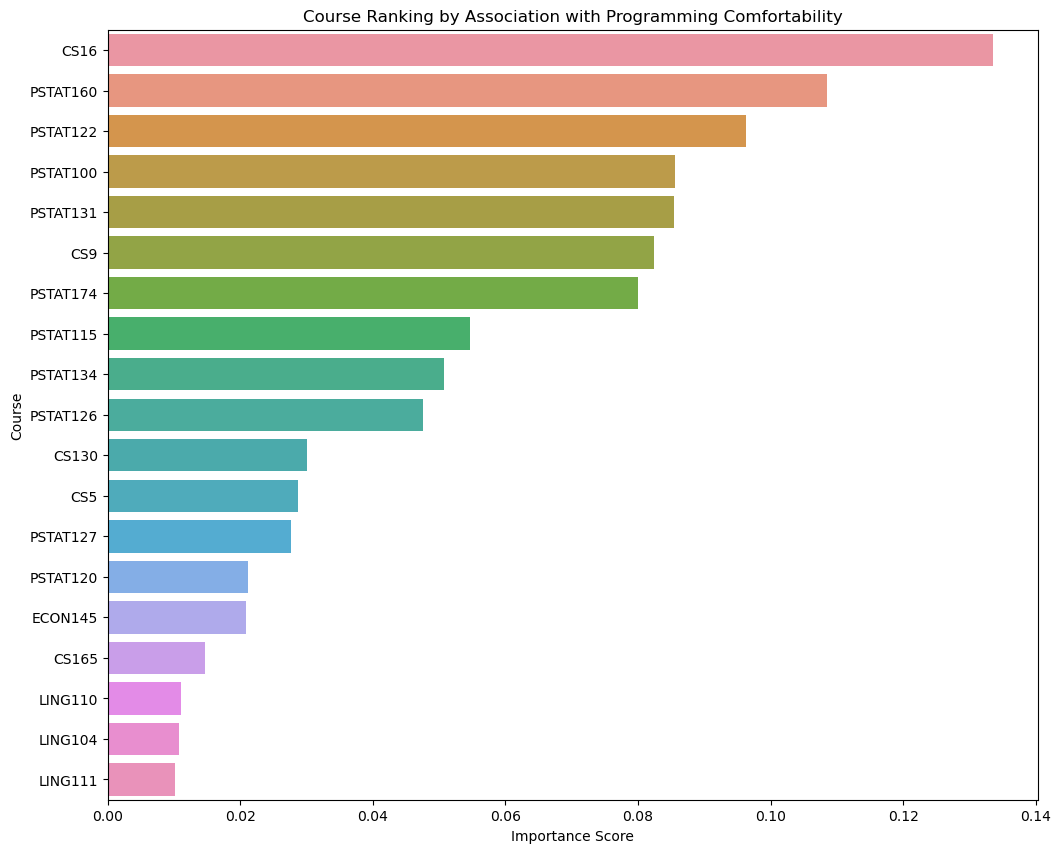

FileNotFoundError: [Errno 2] No such file or directory: 'results/random_forest_course_ranking.png'

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Course', data=course_ranking)
plt.title('Course Ranking by Association with Programming Comfortability')
plt.xlabel('Importance Score')
plt.ylabel('Course')
plt.show()
plt.savefig('results/random_forest_course_ranking.png')

The importance scores do not reveal the direction of associations, only the strength.

### RQ2: Does math proficiency influence the ranking of the importances of courses as predictors for programming comfortability?
We measure the association (in terms of feature importance) between courses and programming comfortability when taking math proficiency into consideration, and get the top courses in terms of importance.

In [ ]:
def analyze_subgroup(subgroup_df, title, course_columns, target_column):
    print(f"{title}")
    print(f"Number of students in this group: {len(subgroup_df)}\n")

    if len(subgroup_df) < 10:
        print("Subgroup is too small for a meaningful analysis.\n")
        return

    X = subgroup_df[course_columns]
    y = subgroup_df[target_column]

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y_encoded)

    importances = model.feature_importances_
    course_ranking = pd.DataFrame({
        'Course': course_columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("Top 5 Most Important Courses for this Group:")
    print(course_ranking.head(), "\n")

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Course', data=course_ranking.head(10))
    plt.title(title)
    plt.xlabel('Importance Score')
    plt.ylabel('Course')
    plt.tight_layout()
    plt.show()
    plt.savefig('random_forest_course_ranking.png')

    return course_ranking.head(10)

Top Courses for Math Proficient Students
Number of students in this group: 24

Top 5 Most Important Courses for this Group:
      Course  Importance
9       CS16    0.157618
3   PSTAT122    0.098201
17  PSTAT134    0.094476
7   PSTAT174    0.086286
6   PSTAT160    0.085958 



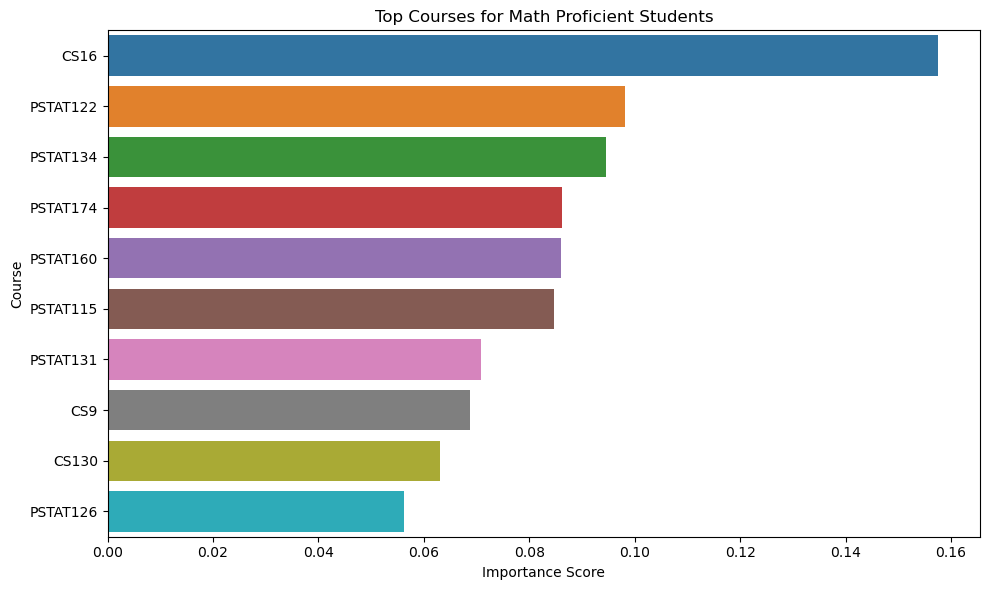

Top Courses for Math Intermediate Students
Number of students in this group: 24

Top 5 Most Important Courses for this Group:
     Course  Importance
0  PSTAT100    0.144121
9      CS16    0.138668
8       CS9    0.103457
3  PSTAT122    0.097809
6  PSTAT160    0.090511 



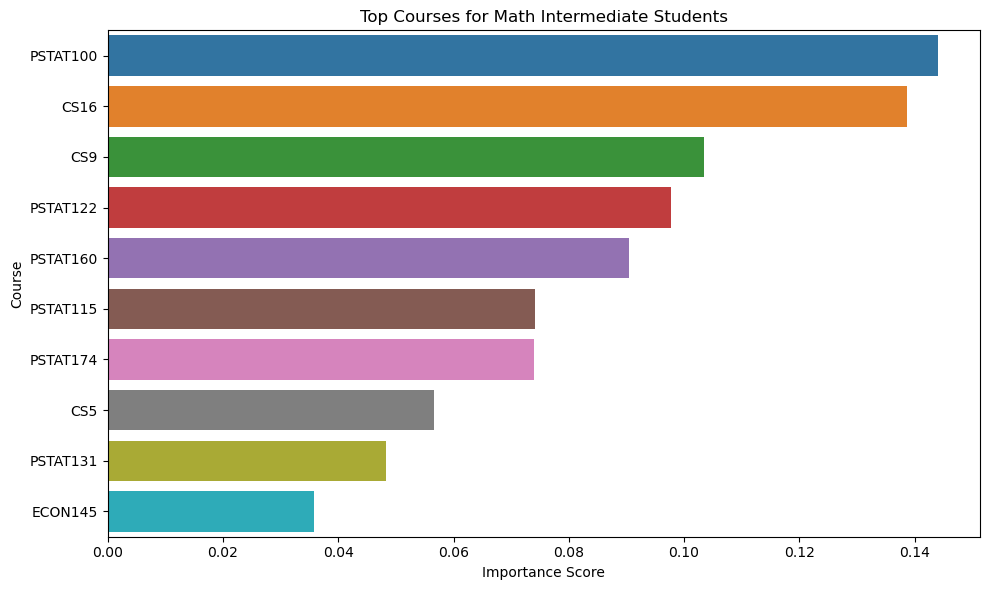

Top Courses for Math Beginner Students
Number of students in this group: 3

Subgroup is too small for a meaningful analysis.

Course Ranking by Math Proficiency
   Rank Course (adv)  Importance (adv) Course (int)  Importance (int)
0     1         CS16          0.157618     PSTAT100          0.144121
1     2     PSTAT122          0.098201         CS16          0.138668
2     3     PSTAT134          0.094476          CS9          0.103457
3     4     PSTAT174          0.086286     PSTAT122          0.097809
4     5     PSTAT160          0.085958     PSTAT160          0.090511
5     6     PSTAT115          0.084680     PSTAT115          0.074120
6     7     PSTAT131          0.070873     PSTAT174          0.074037
7     8          CS9          0.068808          CS5          0.056547
8     9        CS130          0.063108     PSTAT131          0.048330
9    10     PSTAT126          0.056315      ECON145          0.035747
|   Rank | Course (adv)   |   Importance (adv) | Course (int)   |   I

In [26]:
subgroups = {'adv': 'Math Proficient', 'int': 'Math Intermediate', 'beg': 'Math Beginner'}
all_rankings = []

for group_code, group_title in subgroups.items():
    subgroup_df = df[df['math.prof'] == group_code].copy()
    
    # Call your function and capture the returned DataFrame
    ranking_df = analyze_subgroup(subgroup_df, f"Top Courses for {group_title} Students", course_columns, target_column)

    # If the function returned a dataframe (i.e., the group wasn't too small)
    if ranking_df is not None:
        # Prepare the dataframe for merging
        ranking_df = ranking_df.reset_index(drop=True)
        ranking_df.rename(columns={
            'Course': f'Course ({group_code})',
            'Importance': f'Importance ({group_code})'
        }, inplace=True)
        all_rankings.append(ranking_df)

comparison_table = pd.concat(all_rankings, axis=1)
comparison_table.insert(0, 'Rank', range(1, 11))

print("Course Ranking by Math Proficiency")
print(comparison_table)
print(comparison_table.to_markdown(index=False))

In [12]:
math_adv_df = df[df['math.prof'] == 'adv']
math_int_df = df[df['math.prof'] == 'int']
math_beg_df = df[df['math.prof'] == 'beg']

Top Courses for Math Proficient Students
Number of students in this group: 24

Top 5 Most Important Courses for this Group:
      Course  Importance
9       CS16    0.157618
3   PSTAT122    0.098201
17  PSTAT134    0.094476
7   PSTAT174    0.086286
6   PSTAT160    0.085958 



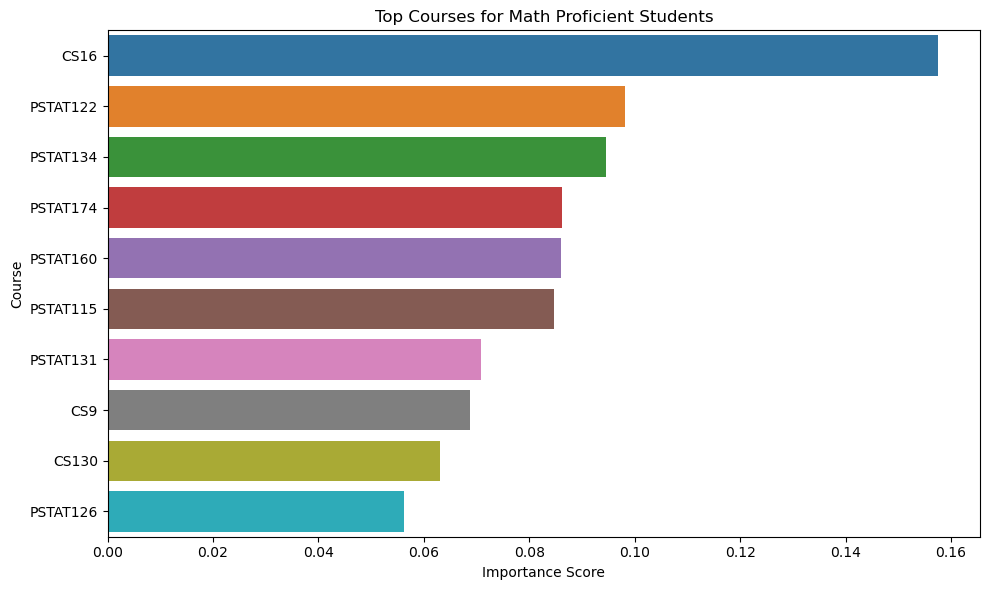

Top Courses for Math Intermediate Students
Number of students in this group: 24

Top 5 Most Important Courses for this Group:
     Course  Importance
0  PSTAT100    0.144121
9      CS16    0.138668
8       CS9    0.103457
3  PSTAT122    0.097809
6  PSTAT160    0.090511 



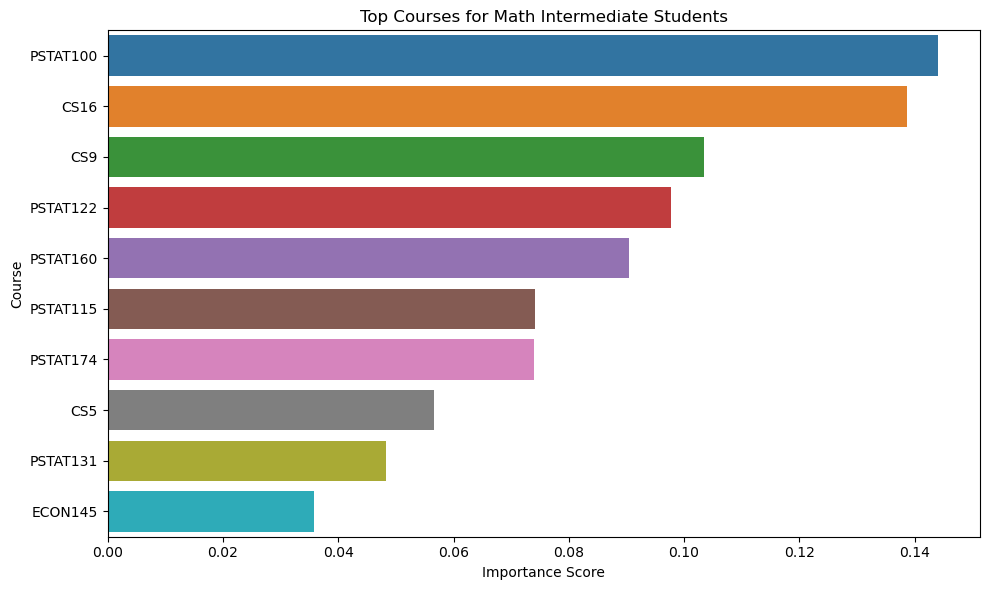

Top Courses for Math Beginner Students
Number of students in this group: 3

Subgroup is too small for a meaningful analysis.



In [13]:
analyze_subgroup(math_adv_df, "Top Courses for Math Proficient Students", course_columns, target_column)
analyze_subgroup(math_int_df, "Top Courses for Math Intermediate Students", course_columns, target_column)
analyze_subgroup(math_beg_df, "Top Courses for Math Beginner Students", course_columns, target_column)